In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from vae.arch_vaegan2 import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

K.set_image_data_format('channels_last')
np.set_printoptions(precision=4, suppress = True)

In [3]:
vae = VAE()
vae.set_weights('./vae/GAN_weights2.h5')

In [4]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[200]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

22599066.npz
(300, 64, 64, 3)


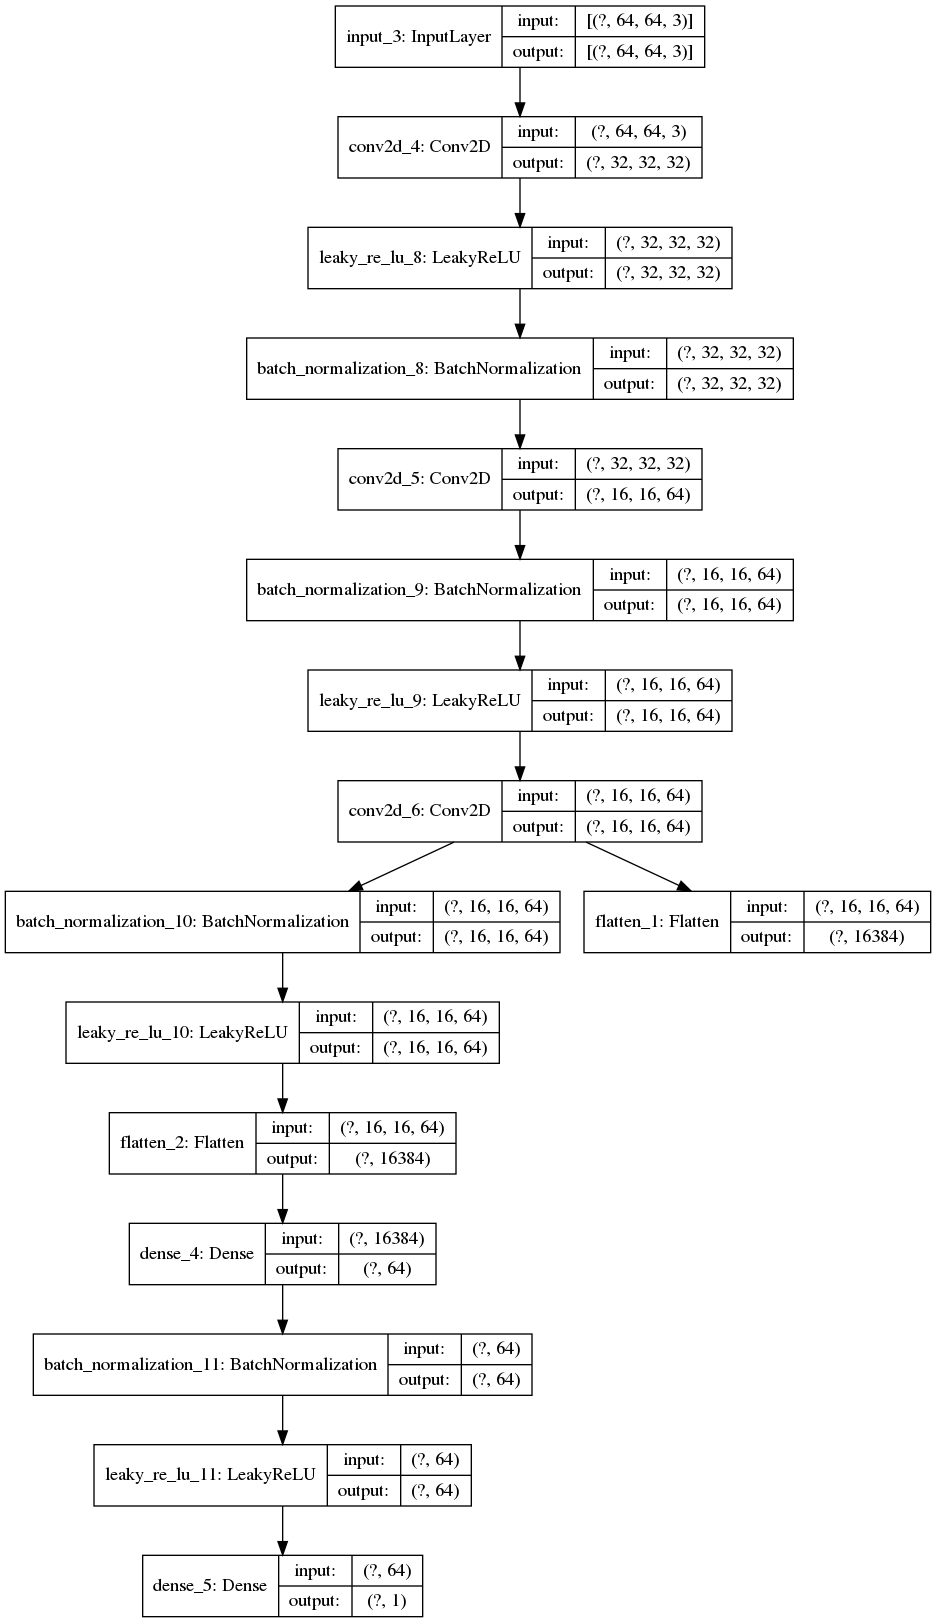

In [5]:
plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)
plot_model(vae.decoder, to_file='./vae/decoder.png', show_shapes=True)
plot_model(vae.discriminator, to_file='./vae/discriminator.png', show_shapes=True)

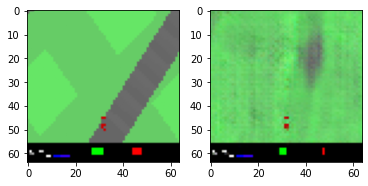

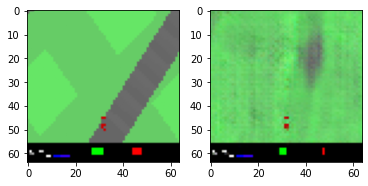

In [6]:
### output from one episode
for idx in range(1,50):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow( z_decoded)
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

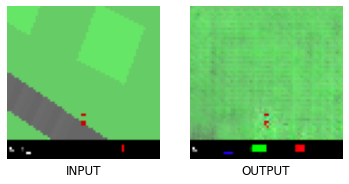

In [7]:
### output from the full_model
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[179]
obs_data = np.load(DIR_NAME + file)['obs']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs)
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [8]:
mus, log_vars, _  = vae.encoder.predict(np.array([obs]))
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [ 0.048  -0.3233  0.2729 -0.0152 -0.1736  0.3024  0.1367 -0.3056 -0.0551
  0.3628  0.1398  0.4474  0.0579 -0.1087 -0.1698  0.118   0.2438 -0.0075
 -0.0401 -0.0082  0.2379  0.2797 -0.0409 -0.2449 -0.0703  0.271  -0.0646
 -0.0595 -0.1026 -0.0471 -0.181   0.0902]
log_var = [0.8173 0.8108 0.7861 0.7879 0.8221 0.6382 0.7913 0.7434 0.7937 0.7284
 0.7322 0.7282 0.7556 0.8164 0.8022 0.7956 0.7579 0.807  0.8548 0.8487
 0.7933 0.8035 0.7894 0.7706 0.8056 0.805  0.7558 0.8041 0.7557 0.7704
 0.8032 0.7631]
z = [[ 0.048  -0.3233  0.2729 -0.0152 -0.1736  0.3024  0.1367 -0.3056 -0.0551
   0.3628  0.1398  0.4474  0.0579 -0.1087 -0.1698  0.118   0.2438 -0.0075
  -0.0401 -0.0082  0.2379  0.2797 -0.0409 -0.2449 -0.0703  0.271  -0.0646
  -0.0595 -0.1026 -0.0471 -0.181   0.0902]]


informative dimensions:


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

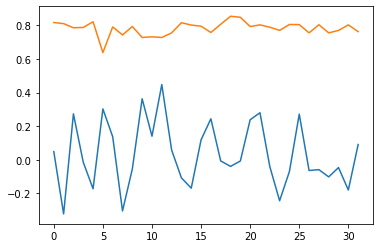

In [9]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.5)[0]
hot_zs

In [10]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

In [11]:
vae.encoder.predict(np.array([obs_data1[20]]))

[array([[-0.2321, -0.1088, -0.6013,  0.7513,  0.034 , -0.7728, -0.2656,
         -0.107 ,  0.3996, -0.2021, -0.8613, -0.4351,  0.6009, -0.1435,
         -0.0075,  0.2948,  0.0182,  0.4495, -0.1943,  0.0713, -0.354 ,
          0.011 , -0.4785, -0.0517,  0.3005,  0.0973,  0.8828,  0.1405,
         -0.9078,  0.5908,  0.5209, -0.6253]], dtype=float32),
 array([[0.751 , 0.7485, 0.6778, 0.6418, 0.7835, 0.5931, 0.7454, 0.6767,
         0.6939, 0.7111, 0.6588, 0.6986, 0.5965, 0.7343, 0.7793, 0.6505,
         0.7551, 0.7349, 0.7658, 0.7631, 0.744 , 0.7328, 0.707 , 0.7375,
         0.7471, 0.7269, 0.6512, 0.7567, 0.6035, 0.677 , 0.7167, 0.7013]],
       dtype=float32),
 array([[-1.8761, -1.1838, -0.6775, -0.0634, -1.2079, -2.1543, -0.7172,
          0.983 ,  0.3423, -0.9498, -0.6104, -1.57  , -0.3886,  0.6244,
         -0.9758, -1.7797,  2.612 ,  1.6023, -2.5582, -0.7486,  0.02  ,
          0.3771,  1.2174, -0.203 , -1.9092,  2.2906,  2.9252,  1.1292,
         -1.0681, -1.1666, -0.8266,  0.053 ]

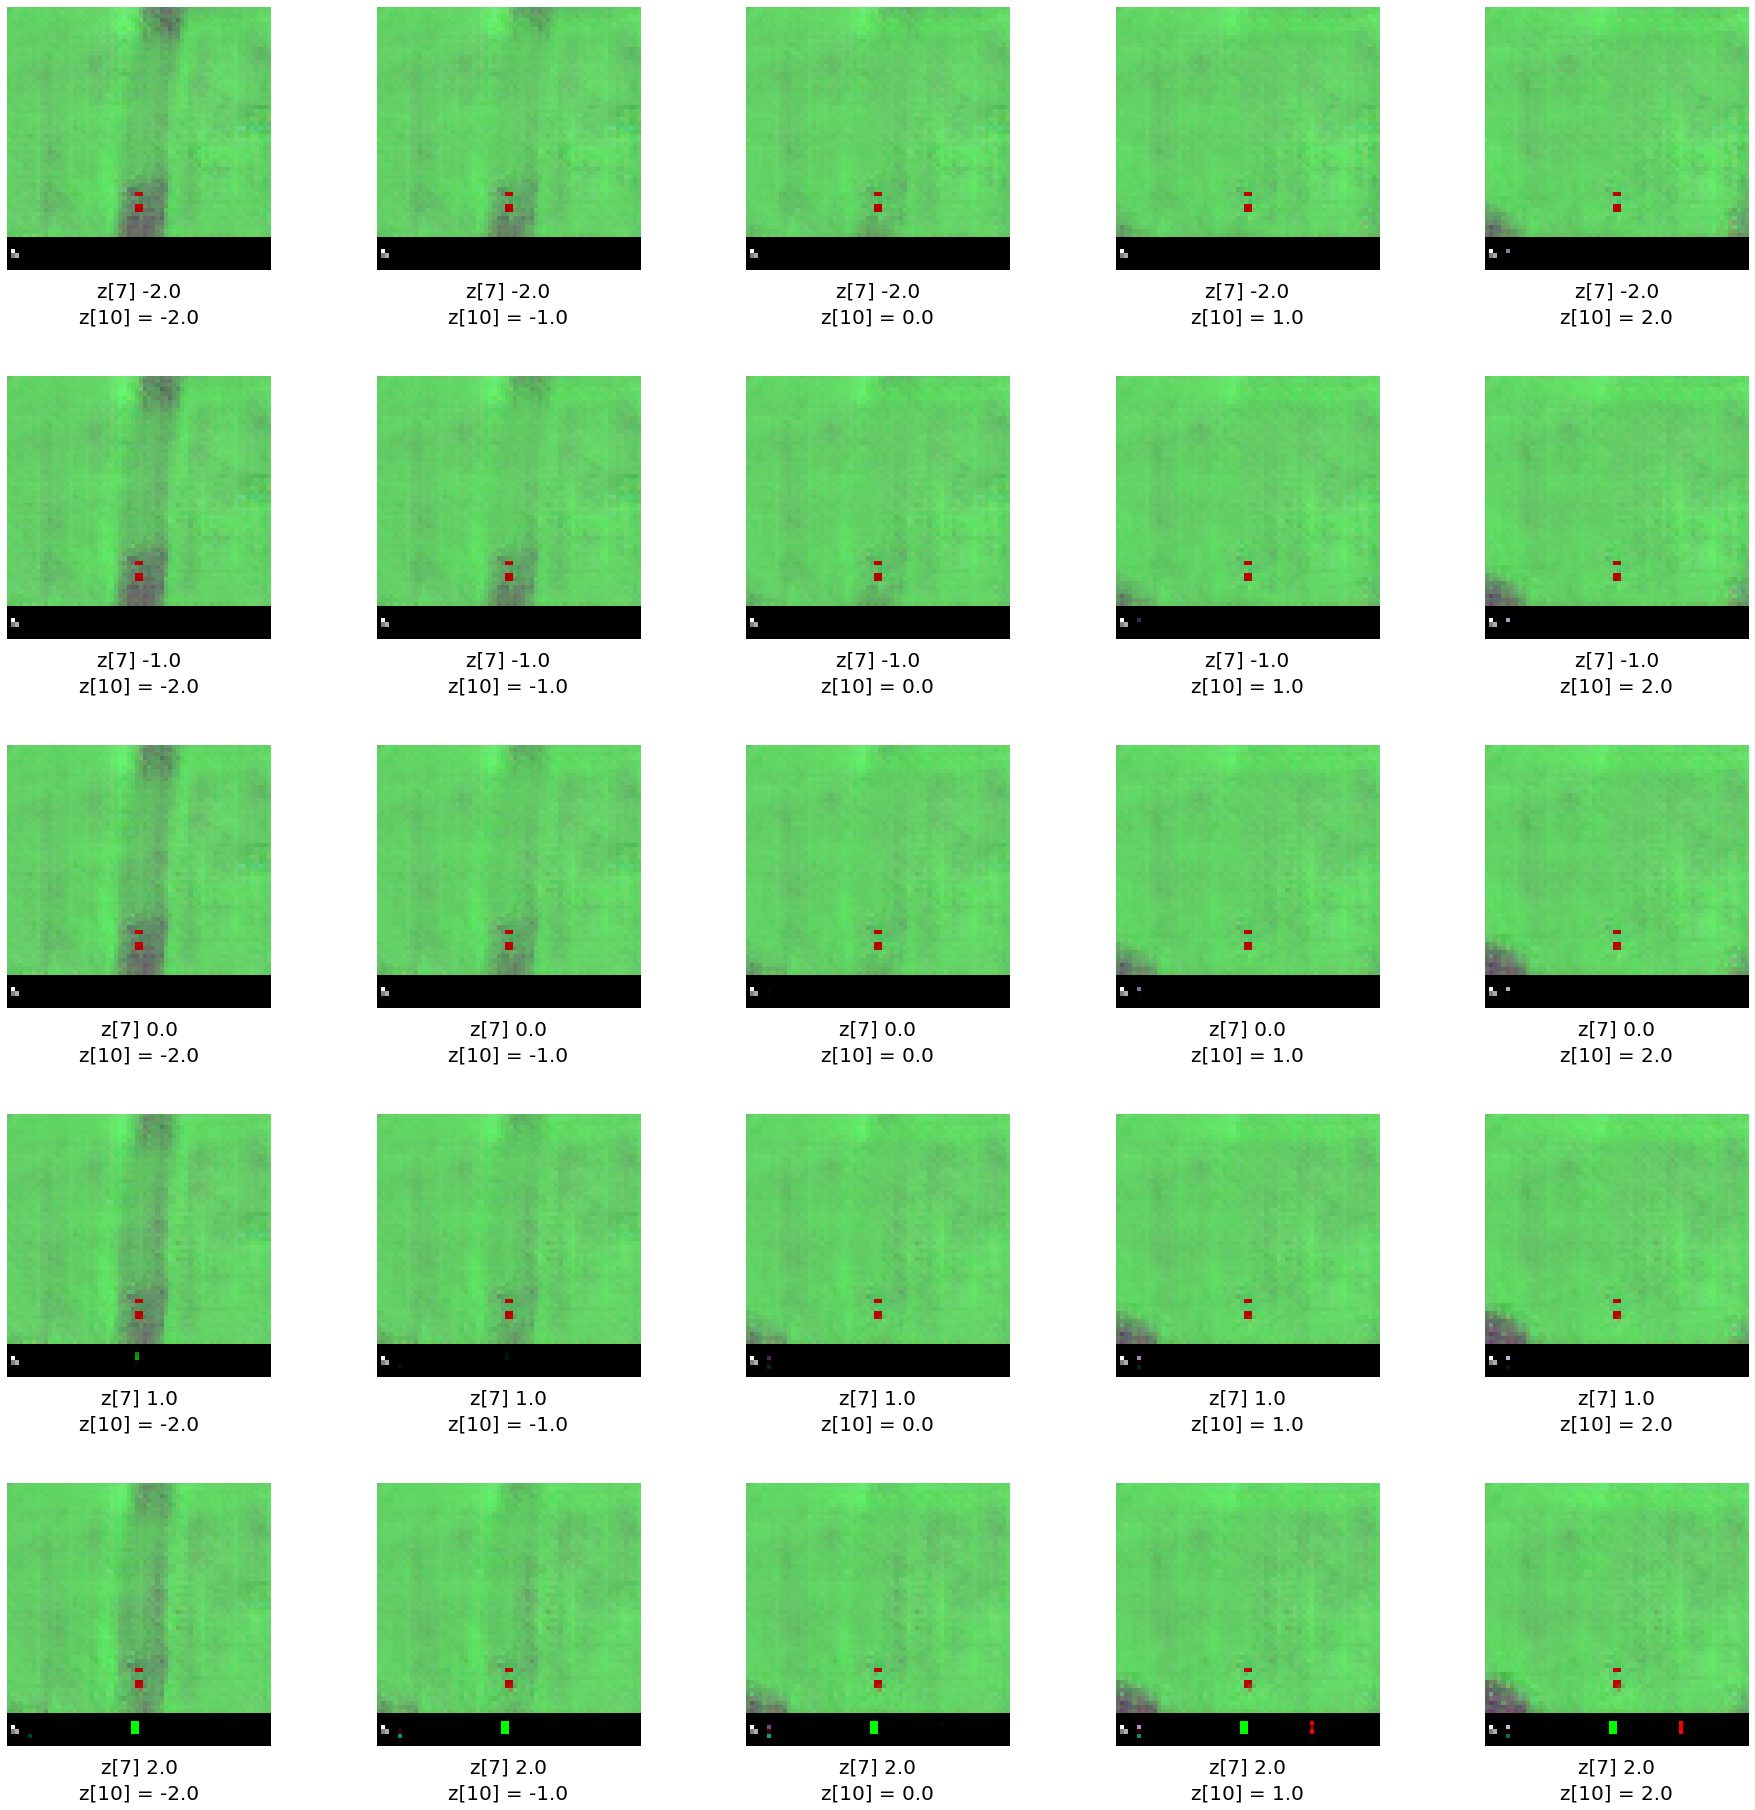

In [12]:
top_left = vae.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[7] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[7] ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [13]:
def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z10 = sample_z[10]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27
    
    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

In [14]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=0.13247910141944885, description='z0', max=3.0, min=-3.0), FloatSlider…

<function __main__.play_with_z(z0=0.1324791, z2=0.17447421, z4=-0.102843896, z5=-0.41831797, z6=0.52604836, z7=-1.1008117, z10=2.0835645, z15=-0.24974066, z24=1.2627566, z25=-0.59774894, z27=0.19176203)>